<a href="https://colab.research.google.com/github/leen05/AI_NEW-REPO/blob/main/Cartoon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load Image
def read_file(filename):
  # Fixed: Changed 'imcv2' to 'cv2'
  img = cv2.imread(filename)  # assigned the result of cv2.imread to img
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  return img
  plt.imshow(img)
  plt.axis('off')  # Optional: Hide axes for better visualization
  plt.show()


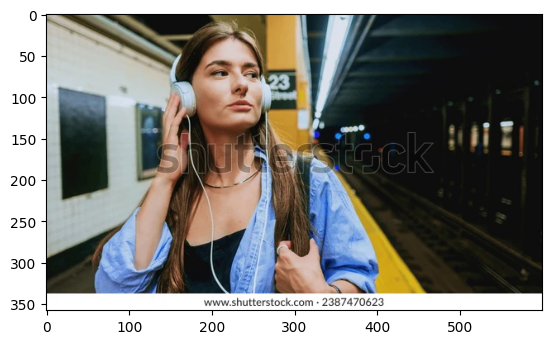

In [ ]:
filename="/young-charming-woman-using-mobile-600w-2387470623.jpg.webp"
img=read_file(filename)
org_img=np.copy(img)

In [ ]:
# Create Edge Mask

def edge_mask(img, line_size, blur_value):
  """
  input: Input image
  output: edges of Images

  """
  gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  gray_blur=cv2.medianBlur(gray,blur_value)
  edges=cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_size,blur_value)
  return edges




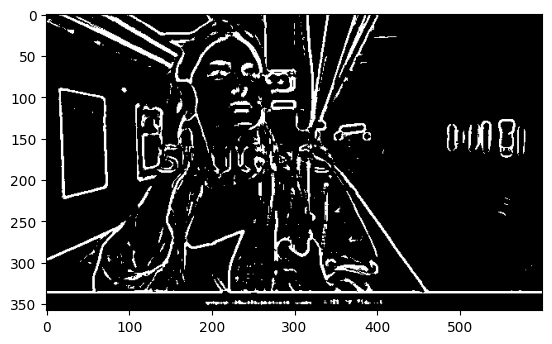

In [ ]:
line_size,blur_value=7,7
edges=edge_mask(img,line_size,blur_value)
plt.imshow(edges,cmap="binary")
plt.show()


In [ ]:

# Reduce the colour palette
def color_quantization(img, k):
  # Resize the image to speed up processing
  img = cv2.resize(img, (500, 300))

  #Transform the Image
  data = np.float32(img).reshape((-1, 3))

  #Determine Criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

  #Implementing K-Means
  ret,label,center=cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
  center=np.uint8(center)
  result=center[label.flatten()]
  result=result.reshape(img.shape)
  return result


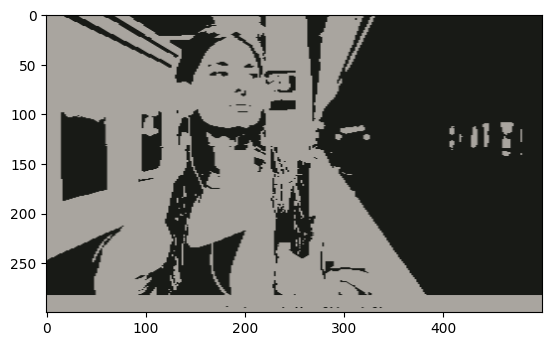

In [ ]:
   img = color_quantization(img , k=9)
   plt.imshow(img)
   plt.show()

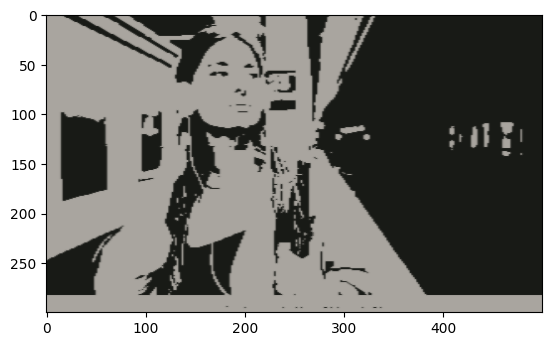

In [ ]:
# Reduce the noise
blurred=cv2.bilateralFilter(img,d=3,sigmaColor=200,sigmaSpace=200)
plt.imshow(blurred)
plt.show()

In [ ]:

def cartoon():
    """
    Combines the edge mask with the quantized image to create a cartoon effect.
    """
    # Ensure edges and blurred have the same size
    edges_resized = cv2.resize(edges, (blurred.shape[1], blurred.shape[0]))  # Resize edges to match blurred

    # Apply bitwise_and with the resized mask
    c = cv2.bitwise_and(blurred, blurred, mask=edges_resized)

    plt.imshow(org_img)
    plt.title("org_img")
    plt.show()



    plt.imshow(c)
    plt.title("Cartoonified image")
    plt.subplots_adjust(hspace=0.5)  # Increase the height spacing between images
    plt.show()



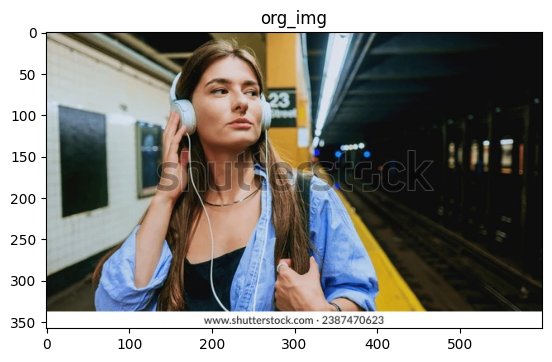

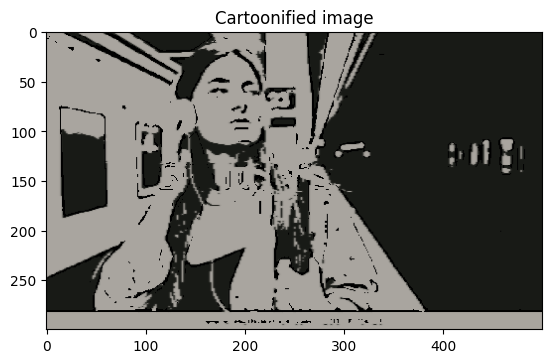

In [ ]:
cartoon()